# Introduction
Sales forecasting is one the most common tasks in many sales driven organizations. This activity enables organizations to adequately plan for the future with a degree of confidence. In this tutorial we’ll use Prophet, a package developed by Facebook to show how one can achieve this. This package is available in both Python and R. We assume that the reader has basic understanding of handling time series data in Python. 
  

<p align="center">
  <img width="400" height="300" src="https://media3.giphy.com/media/JtBZm3Getg3dqxK0zP/giphy.gif">
</p>

# Structure

* Downloading Data
* EDA & Data Preprocessing
* Model Fitting
* Making Future Predictions
* Obtaining the Forecasts
* Plotting the Forecasts
* Plotting the Forecast Components
* Cross Validation
* Obtaining the Performance Metrics
* Visualizing Performance Metrics
* Conclusion

# Importing

In [17]:
# fbProphet
!pip install pystan
!pip install fbprophet
from prophet import Prophet
from prophet.plot import plot_plotly
# Yahoo Finance
!pip install yfinance
import yfinance as yf 
# Others
import pandas as pd
from plotly import graph_objs as go
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [57 lines of output]
      /tmp/pip-install-9w2imt5m/fbprophet_c01829285b4e4320a3610432e914c505/setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Traceback (most recent call last):
        File "<

## Selecting a stock

In [18]:
ySymbol="GOOG"

## Downloading Data From yfinance

In [19]:
#for SymbolName in stocksymbols:
data = yf.download(
    # tickers list or string as well
    tickers = ySymbol,
    # use "period" instead of start/end
    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # (optional, default is '1mo')
    period = "2y",
    # fetch data by interval (including intraday if period < 60 days)
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    # (optional, default is '1d')
    interval = "1d",
    # group by ticker (to access via data['SPY'])
    # (optional, default is 'column')
    group_by = 'ticker',
    # adjust all OHLC(An open-high-low-close chart is a type of chart typically used to illustrate movements in the price of a financial instrument over time) automatically
    # (optional, default is False)
    auto_adjust = True,
    # download pre/post regular market hours data
    # (optional, default is False)
    prepost = True
    )

[*********************100%%**********************]  1 of 1 completed


In [20]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-27,141.585495,142.500000,140.500000,141.501007,18844000
2021-09-28,139.088501,139.606506,135.699997,136.184006,42190000
2021-09-29,137.109695,137.398499,134.250000,134.520996,26338000
2021-09-30,134.324997,135.589996,133.000000,133.265503,35294000
2021-10-01,133.554504,137.070999,133.377502,136.462494,28388000
...,...,...,...,...,...
2023-09-19,138.250000,139.175003,137.500000,138.830002,15479100
2023-09-20,138.830002,138.839996,134.520004,134.589996,21473500
2023-09-21,132.389999,133.190002,131.089996,131.360001,22042700


## Resetting Index

In [21]:
data.reset_index(inplace=True)

# EDA & Data Preprocessing

## Plotting the Raw Data

In [22]:
import plotly.offline as py

In [23]:
py.iplot([go.Scatter(
    x=data['Date'],
    y=data['Close']
)])

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Fixing the dataset according to FBProphet

In [24]:
df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})
df_train.head()

,ds,y
0,2021-09-27,141.501007
1,2021-09-28,136.184006
2,2021-09-29,134.520996
3,2021-09-30,133.265503
4,2021-10-01,136.462494


# Modelling

[Here](https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/) is a link if you want to understand about the model and parameters in detail.

In [25]:
m = Prophet(daily_seasonality=True)
m.fit(df_train)

20:51:24 - cmdstanpy - INFO - Chain [1] start processing
20:51:25 - cmdstanpy - INFO - Chain [1] done processing


## Making Future Predictions

The next step is to prepare our model to make future predictions. This is achieved using the Prophet.make_future_dataframe method and passing the number of days we’d like to predict in the future. We use the periods attribute to specify this. This also include the historical dates. We’ll use these historical dates to compare the predictions with the actual values in the ds column.

* periods: int no. of periods to forecast forward.

In [26]:
future = m.make_future_dataframe(periods=2*365)

## Obtaining the Forecasts

 
We use the predict method to make future predictions. This will generate a dataframe with a yhat column that will contain the predictions.

In [27]:
forecast = m.predict(future)

## Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using mode.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset

             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2021-09-27  141.445219  136.068507  149.276490   141.445219   141.445219   
1    2021-09-28  141.468559  136.110398  149.564197   141.468559   141.468559   
2    2021-09-29  141.491900  136.289563  150.205447   141.491900   141.491900   
3    2021-09-30  141.515240  136.701351  149.320617   141.515240   141.515240   
4    2021-10-01  141.538581  135.881186  149.932039   141.538581   141.538581   
...         ...         ...         ...         ...          ...          ...   
1227 2025-09-20  279.738789  189.298455  378.437884   191.004552   377.459879   
1228 2025-09-21  279.934137  192.743380  379.305044   191.134710   377.821219   
1229 2025-09-22  280.129484  190.724210  381.482176   191.264867   378.256101   
1230 2025-09-23  280.324831  192.908378  379.256076   191.395025   378.685854   
1231 2025-09-24  280.520179  191.991675  380.844865   191.525183   379.038658   

      additive_terms  addit

/home/chris/.local/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/chris/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

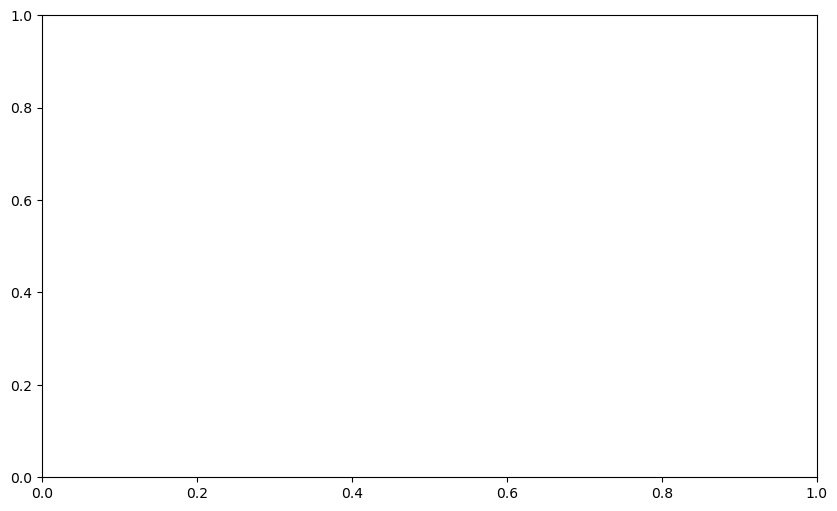

In [38]:
#m.plot(forecast)
print(forecast)
m.plot(forecast)

In [31]:
py.iplot([
    go.Scatter(x=df_train['ds'], y=df_train['y'], name='Actual'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted')
])

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Plotting the Forecast Components

The plot_components method plots the trend, yearly and weekly seasonality of the time series data.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

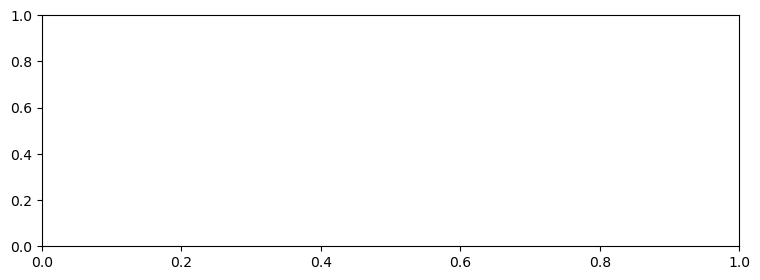

In [41]:
#### Visualize Each Components[Trends,yearly]
import numpy as np
m.plot_components(np.array(forecast))

## Cross Validation

 
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

* Horizon the forecast horizon.
* Initial the size of the initial training period.
* Period the spacing between cutoff dates.

The output of the cross_validation method is a dataframe containing y the true values and yhat the predicted values. We’ll use this dataframe to compute the prediction errors.

In [43]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')
df_cv.head()

ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

## Obtaining the Performance Metrics
 
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

## Visualizing Performance Metrics

The performance Metrics can be visualized using the plot_cross_validation_metric utility. Let’s visualize the RMSE below

In [44]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

NameError: name 'df_cv' is not defined

# Conclusion

 
As we have seen Prophet is very powerful and effective in time series forecasting.

# Thanks for spending some of your valuable time reading my notebook. If you find any value in here do give an upvote 🎇

# Much Appretiated 🌠 

<p align="center">
  <img width="400" height="300" src="https://media.giphy.com/media/xUPGcg1IJEKGCI6r5e/giphy.gif">
</p>